# Personal Exploratory Data Analysis Project

**Author:** Karli Dean
**Due Date:** October 3, 2025

**Purpose:** I belive that volleyball, though fun to watch and play, is an extremely technical sport and can be seen in more beauty through data analysis. Looking at a stat line, you can see that a player can receive recognition for their hitting percentage or their serving ability. However, the way we will look at volleyball will show us why household team names and lifelong fans exist through dynasty at a gameplay level.

### Imports from Python and External Libraries

In [23]:
# Importing packages from the Python Libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Loading the Data from the CSV

In [24]:
# Importing the CSV file into a DataFrame using Pandas
volleyball_df = pd.read_csv('data/ncaavb_d2stats.csv')

### Data Inspection

In [25]:
# Gettign a look at the DataFrame using the head function.
volleyball_df.head(10)

,school_id,school_name,school_conference,sets_played,match_win,match_loss,ttl_ace,ace_set,ttl_assist,assist_set,...,ttl_atterror,ttl_attack,attack_percentage,attack_set,attkill_set,win_percentage,ttl_oppkill,ttl_oppatterror,ttl_oppattack,oppattack_percentage
0,t001,Academy of Art,PacWest,101,6,22,153,1.51,1060,10.50,...,649,3657,0.137,36.21,11.40,0.214286,1286,527,3544,0.214
1,t002,Adams St.,RMAC,101,11,16,97,0.96,1192,11.80,...,605,3833,0.176,37.95,12.66,0.407407,1213,597,3730,0.165
2,t003,Adelphi,NE10,119,23,10,241,2.03,1468,12.34,...,621,4018,0.241,33.76,13.35,0.696970,1218,597,3890,0.160
3,t004,Alas. Anchorage,GNAC,101,16,12,194,1.92,1120,11.09,...,478,3612,0.204,35.76,12.02,0.571429,1219,553,3638,0.183
4,t005,Alas. Fairbanks,GNAC,110,21,7,199,1.81,1364,12.40,...,536,3921,0.234,35.65,13.20,0.750000,1302,574,3894,0.187
5,t006,Albany St. (GA),SIAC,109,19,10,182,1.67,1212,11.12,...,649,3864,0.177,35.45,12.23,0.655172,1194,662,3782,0.141
6,t007,Allen,SIAC,98,7,19,134,1.37,910,9.29,...,536,3415,0.136,34.85,10.20,0.269231,1223,562,3518,0.188
7,t008,American Int'l,NE10,100,21,7,218,2.18,1180,11.80,...,473,3593,0.220,35.93,12.65,0.750000,1065,549,3555,0.145
8,t009,Anderson (SC),South Atlantic,119,19,11,186,1.56,1475,12.39,...,702,4305,0.202,36.18,13.19,0.633333,1277,624,4076,0.160
9,t010,Angelo St.,Lone Star,125,32,3,187,1.50,1705,13.64,...,630,4838,0.244,38.70,14.48,0.914286,1519,685,4724,0.177


In [26]:
# Gaining other details on this df from the shape, dtypes, and describe functions.
print(volleyball_df.shape)
print(volleyball_df.info())

(279, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school_id             279 non-null    object 
 1   school_name           279 non-null    object 
 2   school_conference     279 non-null    object 
 3   sets_played           279 non-null    int64  
 4   match_win             279 non-null    int64  
 5   match_loss            279 non-null    int64  
 6   ttl_ace               279 non-null    int64  
 7   ace_set               279 non-null    float64
 8   ttl_assist            279 non-null    int64  
 9   assist_set            279 non-null    float64
 10  ttl_soloblock         279 non-null    int64  
 11  ttl_blockassist       279 non-null    int64  
 12  block_set             279 non-null    float64
 13  ttl_dig               279 non-null    int64  
 14  dig_set               279 non-null    float64
 15  ttl_attkill  

### Descriptive Statistics

In [27]:
# Acquiring a statistical overview with describe function
volleyball_df.describe()

,sets_played,match_win,match_loss,ttl_ace,ace_set,ttl_assist,assist_set,ttl_soloblock,ttl_blockassist,block_set,...,ttl_atterror,ttl_attack,attack_percentage,attack_set,attkill_set,win_percentage,ttl_oppkill,ttl_oppatterror,ttl_oppattack,oppattack_percentage
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,...,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,103.853047,14.204301,13.949821,173.261649,1.659785,1154.100358,11.027348,56.200717,274.551971,1.846810,...,551.089606,3705.358423,0.184287,35.628136,11.929749,0.492504,1244.885305,553.770609,3705.193548,0.188341
std,12.158571,7.188459,5.645173,42.959991,0.327038,236.989050,1.404808,19.760687,91.656753,0.399834,...,74.195027,529.913697,0.049907,2.422851,1.481097,0.218656,154.124241,90.667852,529.395887,0.032200
min,62.000000,0.000000,1.000000,60.000000,0.730000,396.000000,5.820000,16.000000,45.000000,0.760000,...,309.000000,1848.000000,-0.007000,27.180000,6.130000,0.000000,716.000000,274.000000,1927.000000,0.101000
25%,97.000000,9.000000,10.000000,145.500000,1.445000,998.000000,10.205000,42.500000,211.000000,1.565000,...,503.000000,3413.000000,0.154000,34.210000,11.150000,0.333333,1158.000000,490.000000,3383.000000,0.168000
50%,104.000000,14.000000,14.000000,170.000000,1.640000,1173.000000,11.240000,53.000000,270.000000,1.860000,...,551.000000,3696.000000,0.187000,35.520000,12.150000,0.500000,1260.000000,554.000000,3704.000000,0.187000
75%,112.000000,19.000000,18.000000,198.500000,1.865000,1306.000000,11.920000,69.000000,332.500000,2.105000,...,600.500000,4037.500000,0.219500,37.240000,12.915000,0.655172,1340.000000,610.000000,4040.000000,0.210500
max,137.000000,34.000000,28.000000,334.000000,2.780000,1768.000000,13.930000,124.000000,529.000000,2.910000,...,754.000000,5156.000000,0.300000,42.150000,15.010000,0.971429,1736.000000,828.000000,5371.000000,0.292000


### Data Distribution for Numerical Columns

<Axes: >

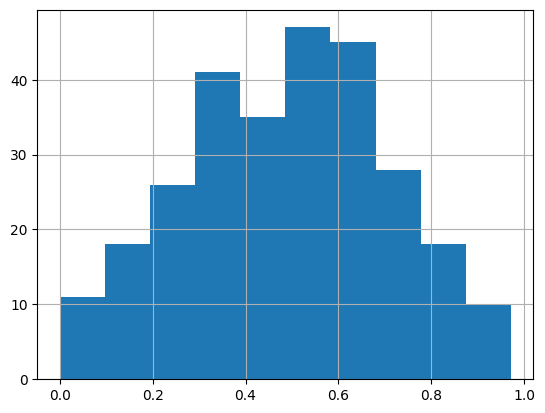

In [30]:
# Inspecting histograms for all numerical columns
volleyball_df['win_percentage'].hist()

### Data Distribution for Categorical Columns

### Data Transformation and Feature Engineering

### Visualizations

### Insights

### Final Annotations